In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv('adaptability_level.csv')
print(data.head())
print(data.describe().T)
print(data.columns.tolist())

  Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No     Town   
1      University          Private  Female   23  Mobile         No     Town   
2         College           Public  Female   18  Mobile         No     Town   
3          School          Private  Female   11  Mobile         No     Town   
4          School          Private  Female   18  Mobile         No     Town   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 Mid   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 Mid   Mobile Data           4G          Moderate  
4                Poor   Mobile Data           3G               Low  
      count      mean       std  min   25%   50%   75%   max
Age  1205.0  17.06556  5.830369  9.0  11.0  18.0  

<Figure size 1600x900 with 0 Axes>

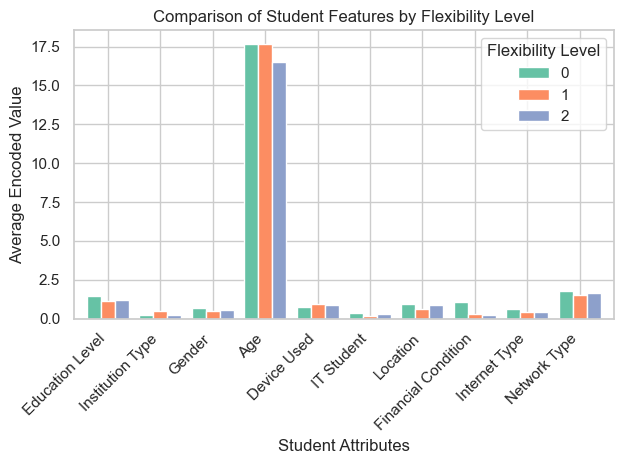

In [9]:
# Load the dataset
data = pd.read_csv('adaptability_level.csv')

# Define the correct features
all_features = [
    "Education Level", "Institution Type", "Gender", "Age", "Device",
    "IT Student", "Location", "Financial Condition", "Internet Type", "Network Type"
]

# Descriptive labels (optional if you want nicer axis names)
feature_labels = {
    "Education Level": "Education Level",
    "Institution Type": "Institution Type",
    "Gender": "Gender",
    "Age": "Age",
    "Device": "Device Used",
    "IT Student": "IT Student",
    "Location": "Location",
    "Financial Condition": "Financial Condition",
    "Internet Type": "Internet Type",
    "Network Type": "Network Type"
}

# Encode categorical columns
data_encoded = data.copy()
label_enc = LabelEncoder()
for col in all_features + ['Flexibility Level']:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = label_enc.fit_transform(data_encoded[col])

# Group by Flexibility Level and calculate average of features
grouped_data = data_encoded.groupby("Flexibility Level")[all_features].mean().T

# Plot the grouped bar chart
plt.figure(figsize=(16, 9))
grouped_data.plot(kind="bar", color=["#66c2a5", "#fc8d62", "#8da0cb"], width=0.8)

# Axis labels and title
plt.xlabel("Student Attributes")
plt.ylabel("Average Encoded Value")
plt.title("Comparison of Student Features by Flexibility Level")

# Use descriptive labels for x-ticks
plt.xticks(range(len(all_features)), [feature_labels[col] for col in all_features], rotation=45, ha="right")

# Add legend
plt.legend(title="Flexibility Level", labels=grouped_data.columns.tolist())

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# Apply one-hot encoding to all object (categorical) columns
data_encoded = pd.get_dummies(data, drop_first=True)

# View the resulting DataFrame
# print(data_encoded.head())

In [13]:
# Print the column names of the dataset
print(data.columns)


Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')


In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('adaptability_level.csv')

data['Education Level'] = data['Education Level'].map({
    'School': 0,
    'University': 1,
    'College': 2
})

data['Institution Type'] = [1 if x == 'Private' else 0 for x in data['Institution Type']]
# Convert Gender: 1 if 'Male', else 0
data['Gender'] = [1 if x == 'Male' else 0 for x in data['Gender']]

# Convert Device: 1 if 'Mobile', else 0
data['Device'] = data['Device'].map({
    'Mobile': 0,
    'Computer': 1,
    'Tab': 2
})

# Convert IT Student: 1 if 'Yes', else 0
data['IT Student'] = [1 if x == 'Yes' else 0 for x in data['IT Student']]

# Convert Location: 1 if 'Town', else 0
data['Location'] = [1 if x == 'Town' else 0 for x in data['Location']]

# Convert Financial Condition: 1 if 'Poor', else 0
data['Financial Condition'] = data['Financial Condition'].map({
    'Poor': 0,
    'Mid': 1,
    'Rich': 2
})
# Convert Internet Type: 1 if 'Wifi', else 0
data['Internet Type'] = [1 if x == 'Wifi' else 0 for x in data['Internet Type']]

# Convert Network Type: 1 if '3G', else 0
data['Network Type'] = data['Network Type'].map({
    '2G': 0,
    '3G': 1,
    '4G': 2
})
# Manually mapping Adaptability Level categories

data['Flexibility Level'] = data['Flexibility Level'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

# We assume Flexibility Level is already numerical, if not you can modify accordingly.

# Save the modified data to a new CSV file
data.to_csv('adaptability_level_modified.csv', index=False)

# Display the first few rows of the modified data
print(data.head())


   Education Level  Institution Type  Gender  Age  Device  IT Student  \
0                1                 1       1   23       2           0   
1                1                 1       0   23       0           0   
2                2                 0       0   18       0           0   
3                0                 1       0   11       0           0   
4                0                 1       0   18       0           0   

   Location  Financial Condition  Internet Type  Network Type  \
0         1                    1              1             2   
1         1                    1              0             2   
2         1                    1              1             2   
3         1                    1              0             2   
4         1                    0              0             1   

   Flexibility Level  
0                  1  
1                  1  
2                  1  
3                  1  
4                  0  


In [25]:
x = data.drop(columns=['Flexibility Level'])
y = data['Flexibility Level']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
prediction_before_smote = dcs.predict(x_test)
y.value_counts()

Flexibility Level
1    625
0    480
2    100
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x,y)

In [30]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=.25, random_state=43)

In [35]:
y.value_counts()

Flexibility Level
1    625
0    625
2    625
Name: count, dtype: int64

In [36]:
from sklearn.tree import DecisionTreeClassifier
dcs = DecisionTreeClassifier()
dcs.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score


# Step 2: Convert one-hot encoded labels to class indices (if applicable)
if len(y_test1.shape) > 1 and y_test1.shape[1] > 1:  # Check if it's one-hot encoded
    y_test1 = np.argmax(y_test1, axis=1)
    dcs_prediction = np.argmax(dcs, axis=1)


# Remove NaN values if necessary
y_test1 = np.nan_to_num(y_test1)
dcs_prediction = np.nan_to_num(dcs_prediction)

# Step 4: Calculate Accuracy and Precision
dcs_accuracy = accuracy_score(dcs_prediction, y_test1)
dcs_precision = precision_score(y_test1, dcs_prediction, average='macro')  # Use 'binary' for binary classification or 'macro' for multi-class

print(f"Accuracy: {dcs_accuracy * 100}")
print(f"Precision: {dcs_precision * 100}")


Accuracy: 86.99360341151386
Precision: 86.74892767223007


In [44]:
from joblib import load


loaded_model = load("decision_tree_model.joblib")
loaded_model = loaded_model.predict(x_test1)

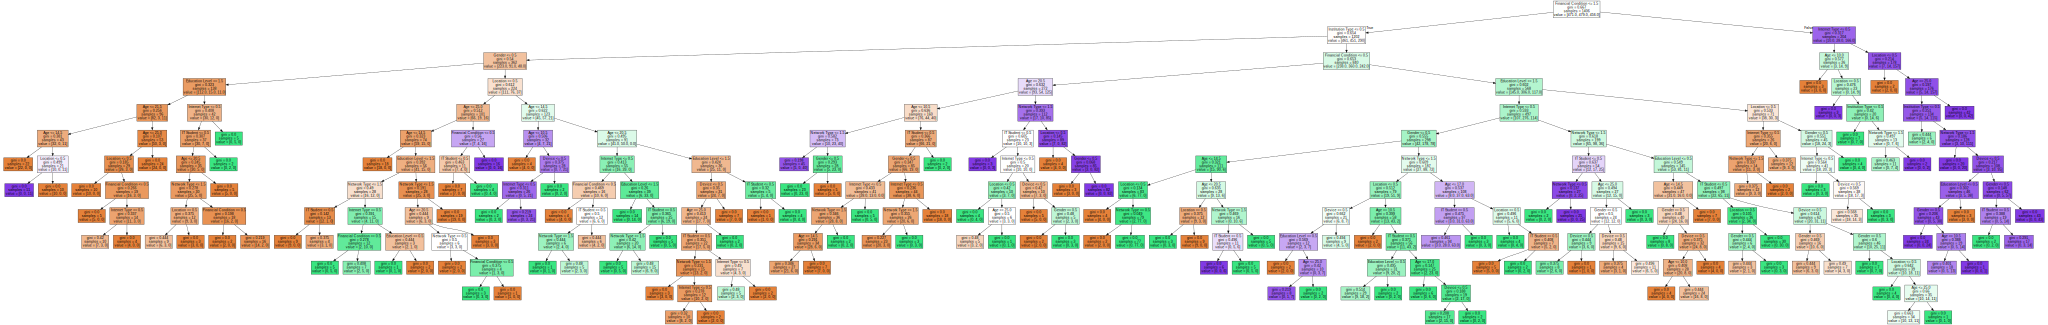

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import joblib
from joblib import dump

dcs = DecisionTreeClassifier()
dcs.fit(x_train1, y_train1)
export_graphviz(dcs, out_file='tree.dot', filled = True, feature_names=x_train.columns)
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

# dump = joblib.dump(dcs, "decision_tree_model.joblib")
